# Analysis Development Notebook

Python is a great tool for analysing data and what makes it even better is the fact that analysts, developers, scientists, etc., have contributed their code in the form of packages so that we don't have to build things from scratch every single time we analyse data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import altair as alt
pd.set_option('display.max_columns', None)

%matplotlib inline

## 1. Collecting Data

A common way to load your data as is as `df`, which stads for __dataframe__. You can think of a dataframe as a spreadsheet document such as Microsoft Excel or Google Sheets.

The python package called pandas has many useful tools to help us manipulate spreadsheet-like objects (a.k.a. dataframes).

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/ramonprz01/codevelop-march-2020/master/data/activities_data.csv")

We always want to make sure the dataset was loaded into memory corrently and also see if we can spot some inconsistencies right off the bat. We can do that 

In [19]:
df.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
0,Running,2020-03-15 18:36:50,False,Sydney Running,2.38,317,00:19:31,155,182,3.4,166,183,8:13,6:48,141,174,1.18,0.0,0.0,0.0,0.0,0.0,0:00,0:00,68.0,0:00,No,03:02.70,3,0.0
1,Running,2020-03-11 18:26:18,False,Sydney Running,4.09,550,00:33:29,158,171,4.0,166,181,8:11,6:48,226,256,1.18,0.0,0.0,0.0,0.0,0.0,0:00,0:00,71.6,0:00,No,00:53.73,5,0.0
2,Running,2020-03-08 17:48:07,False,Sydney Running,2.82,336,00:21:16,150,168,3.3,167,195,7:32,5:44,128,190,1.28,0.0,0.0,0.0,0.0,0.0,0:00,0:00,71.6,0:00,No,06:12.32,3,0.0
3,Running,2020-03-04 18:41:53,False,Sydney Running,1.00,117,00:08:24.7,136,148,2.0,160,175,8:24,7:37,39,62,1.19,0.0,0.0,0.0,0.0,0.0,0:00,0:00,77.0,0:00,No,00:00.46,2,0.0
4,Running,2020-02-29 15:55:38,False,Sydney Running,2.80,347,00:22:17,150,170,3.4,166,213,7:58,6:38,135,187,1.22,0.0,0.0,0.0,0.0,0.0,0:00,0:00,80.6,0:00,No,06:13.66,3,0.0


In [20]:
df.tail()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
449,Running,2017-10-06 11:04:11,False,Kansas City Running,4.44,608,00:44:14,141,162,3.5,157,169,9:58,7:58,144,138,1.03,0.0,0.0,0.0,0.0,0.0,0:00,0:00,80.6,0:00,No,00:00.00,--,0.0
450,Strength Training,2017-09-25 19:30:13,False,Strength,0.00,80,00:15:46,88,107,0.2,--,--,--,--,--,--,0.00,0.0,0.0,0.0,0.0,0.0,0:00,0:00,73.4,0:00,No,00:00.00,--,0.0
451,Running,2017-09-21 12:16:19,False,Kansas City Running,4.25,565,00:37:26,149,182,3.9,165,180,8:48,7:19,108,121,1.11,0.0,0.0,0.0,0.0,0.0,0:00,0:00,86.0,0:00,No,00:00.00,--,0.0
452,Running,2017-09-19 18:45:46,False,Kansas City Running,4.32,553,00:36:57,148,170,4.2,165,177,8:33,7:16,98,141,1.14,0.0,0.0,0.0,0.0,0.0,0:00,0:00,82.4,0:00,No,00:00.00,--,0.0
453,Running,2017-09-16 15:17:18,False,Kansas City Running,3.02,404,00:24:56,156,187,3.8,161,200,8:15,4:57,59,98,1.21,0.0,0.0,0.0,0.0,0.0,0:00,0:00,84.2,0:00,No,00:00.00,--,0.0


In [21]:
df.shape

(454, 30)

## 2. Preparing Data 4 Analysis

In [22]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [23]:
# Let's first have a look at our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 30 columns):
activity_type               454 non-null object
date                        454 non-null object
favorite                    454 non-null bool
title                       454 non-null object
distance                    454 non-null float64
calories                    454 non-null object
time                        454 non-null object
avg_hr                      454 non-null int64
max_hr                      454 non-null int64
aerobic_te                  454 non-null object
avg_run_cadence             454 non-null object
max_run_cadence             454 non-null object
avg_pace                    454 non-null object
best_pace                   454 non-null object
elev_gain                   454 non-null object
elev_loss                   454 non-null object
avg_stride_length           454 non-null float64
avg_vertical_ratio          454 non-null float64
avg_vertical_oscillation    454 

In [24]:
df.describe()

,distance,avg_hr,max_hr,avg_stride_length,avg_vertical_ratio,avg_vertical_oscillation,training_stress_score®,grit,flow,min_temp,max_temp
count,454.000000,454.000000,454.000000,454.000000,454.0,454.0,454.0,454.0,454.0,454.000000,454.0
mean,1.549229,126.618943,146.788546,0.696938,0.0,0.0,0.0,0.0,0.0,78.240969,0.0
std,1.100382,22.570717,21.611751,0.570507,0.0,0.0,0.0,0.0,0.0,5.903790,0.0
min,0.000000,70.000000,82.000000,0.000000,0.0,0.0,0.0,0.0,0.0,55.400000,0.0
25%,0.830000,105.250000,129.000000,0.000000,0.0,0.0,0.0,0.0,0.0,75.200000,0.0
50%,1.030000,134.000000,151.000000,1.060000,0.0,0.0,0.0,0.0,0.0,77.000000,0.0
75%,2.050000,146.000000,164.000000,1.170000,0.0,0.0,0.0,0.0,0.0,82.400000,0.0
max,4.690000,164.000000,190.000000,2.030000,0.0,0.0,0.0,0.0,0.0,96.800000,0.0


In [25]:
df.replace('--', np.nan, inplace=True)

In [26]:
df.tail()

,activity_type,date,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,max_run_cadence,avg_pace,best_pace,elev_gain,elev_loss,avg_stride_length,avg_vertical_ratio,avg_vertical_oscillation,training_stress_score®,grit,flow,climb_time,bottom_time,min_temp,surface_interval,decompression,best_lap_time,number_of_runs,max_temp
449,Running,2017-10-06 11:04:11,False,Kansas City Running,4.44,608,00:44:14,141,162,3.5,157,169,9:58,7:58,144,138,1.03,0.0,0.0,0.0,0.0,0.0,0:00,0:00,80.6,0:00,No,00:00.00,NaN,0.0
450,Strength Training,2017-09-25 19:30:13,False,Strength,0.00,80,00:15:46,88,107,0.2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0:00,0:00,73.4,0:00,No,00:00.00,NaN,0.0
451,Running,2017-09-21 12:16:19,False,Kansas City Running,4.25,565,00:37:26,149,182,3.9,165,180,8:48,7:19,108,121,1.11,0.0,0.0,0.0,0.0,0.0,0:00,0:00,86.0,0:00,No,00:00.00,NaN,0.0
452,Running,2017-09-19 18:45:46,False,Kansas City Running,4.32,553,00:36:57,148,170,4.2,165,177,8:33,7:16,98,141,1.14,0.0,0.0,0.0,0.0,0.0,0:00,0:00,82.4,0:00,No,00:00.00,NaN,0.0
453,Running,2017-09-16 15:17:18,False,Kansas City Running,3.02,404,00:24:56,156,187,3.8,161,200,8:15,4:57,59,98,1.21,0.0,0.0,0.0,0.0,0.0,0:00,0:00,84.2,0:00,No,00:00.00,NaN,0.0


In [28]:
df['number_of_runs'].unique()

array(['3', '5', '2', '1', '4', nan], dtype=object)

In [29]:
df.drop(['avg_vertical_ratio', 'avg_vertical_oscillation',
         'training_stress_score®', 'grit', 'flow', 'favorite',
         'bottom_time', 'surface_interval', 'best_lap_time', 
         'max_temp', 'decompression'], axis=1, inplace=True)

In [30]:
df.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,max_run_cadence,avg_pace,best_pace,elev_gain,elev_loss,avg_stride_length,climb_time,min_temp,number_of_runs
0,Running,2020-03-15 18:36:50,Sydney Running,2.38,317,00:19:31,155,182,3.4,166,183,8:13,6:48,141,174,1.18,0:00,68.0,3
1,Running,2020-03-11 18:26:18,Sydney Running,4.09,550,00:33:29,158,171,4.0,166,181,8:11,6:48,226,256,1.18,0:00,71.6,5
2,Running,2020-03-08 17:48:07,Sydney Running,2.82,336,00:21:16,150,168,3.3,167,195,7:32,5:44,128,190,1.28,0:00,71.6,3
3,Running,2020-03-04 18:41:53,Sydney Running,1.00,117,00:08:24.7,136,148,2.0,160,175,8:24,7:37,39,62,1.19,0:00,77.0,2
4,Running,2020-02-29 15:55:38,Sydney Running,2.80,347,00:22:17,150,170,3.4,166,213,7:58,6:38,135,187,1.22,0:00,80.6,3


Fix the date

Make your numerical variables numerical.

In [32]:
type(df['time'].iloc[1])

str

In [33]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.year.value_counts()

2018    224
2019    198
2020     20
2017     12
Name: date, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 29 columns):
activity_type        454 non-null object
date                 454 non-null datetime64[ns]
title                454 non-null object
distance             454 non-null float64
calories             453 non-null float64
time                 454 non-null object
avg_hr               454 non-null int64
max_hr               454 non-null int64
aerobic_te           453 non-null float64
avg_run_cadence      287 non-null float64
max_run_cadence      287 non-null float64
avg_pace             438 non-null object
best_pace            438 non-null object
elev_gain            284 non-null object
elev_loss            278 non-null object
avg_stride_length    454 non-null float64
climb_time           454 non-null object
min_temp             454 non-null float64
number_of_runs       449 non-null float64
month                454 non-null int64
year                 454 non-null int64
week                 4

In [35]:
df['calories'] = pd.to_numeric(df['calories'])
df['aerobic_te'] = pd.to_numeric(df['aerobic_te'])
df['avg_run_cadence'] = pd.to_numeric(df['avg_run_cadence'])
df['max_run_cadence'] = pd.to_numeric(df['max_run_cadence'])
df['number_of_runs'] = pd.to_numeric(df['number_of_runs'])

In [36]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.week
df['weekday'] = df['date'].dt.weekday
df['quarter'] = df['date'].dt.quarter
df['time_exercise'] = df['date'].dt.time
df['date_exercise'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.weekday_name

In [47]:
time_of_day = []

for i in df['time_exercise']:
    if i > datetime.time(5, 59, 59) and i < datetime.time(12, 0, 0):
        time_of_day.append('morning')
    elif i > datetime.time(11, 59, 59) and i < datetime.time(18, 0, 0):
        time_of_day.append('afternoon')
    else:
        time_of_day.append('night')

In [48]:
time_of_day[-5:]

['morning', 'night', 'afternoon', 'night', 'afternoon']

In [49]:
df['time_day'] = time_of_day

In [50]:
df.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,max_run_cadence,avg_pace,best_pace,elev_gain,elev_loss,avg_stride_length,climb_time,min_temp,number_of_runs,month,year,week,weekday,quarter,time_exercise,date_exercise,day_of_week,time_day
0,Running,2020-03-15 18:36:50,Sydney Running,2.38,317.0,00:19:31,155,182,3.4,166.0,183.0,8:13,6:48,141,174,1.18,0:00,68.0,3.0,3,2020,11,6,1,18:36:50,2020-03-15,Sunday,night
1,Running,2020-03-11 18:26:18,Sydney Running,4.09,550.0,00:33:29,158,171,4.0,166.0,181.0,8:11,6:48,226,256,1.18,0:00,71.6,5.0,3,2020,11,2,1,18:26:18,2020-03-11,Wednesday,night
2,Running,2020-03-08 17:48:07,Sydney Running,2.82,336.0,00:21:16,150,168,3.3,167.0,195.0,7:32,5:44,128,190,1.28,0:00,71.6,3.0,3,2020,10,6,1,17:48:07,2020-03-08,Sunday,afternoon
3,Running,2020-03-04 18:41:53,Sydney Running,1.00,117.0,00:08:24.7,136,148,2.0,160.0,175.0,8:24,7:37,39,62,1.19,0:00,77.0,2.0,3,2020,10,2,1,18:41:53,2020-03-04,Wednesday,night
4,Running,2020-02-29 15:55:38,Sydney Running,2.80,347.0,00:22:17,150,170,3.4,166.0,213.0,7:58,6:38,135,187,1.22,0:00,80.6,3.0,2,2020,9,5,1,15:55:38,2020-02-29,Saturday,afternoon


## 3. Descriptive Statistics

In [57]:
week_or_end = []

for day in df['weekday']:
    if day >= 5:
        week_or_end.append('weekend')
    else:
        week_or_end.append('week_day')

week_or_end[:5]

['weekend', 'week_day', 'weekend', 'week_day', 'weekend']

In [58]:
df['week_or_end'] = week_or_end

In [59]:
df.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,max_run_cadence,avg_pace,best_pace,elev_gain,elev_loss,avg_stride_length,climb_time,min_temp,number_of_runs,month,year,week,weekday,quarter,time_exercise,date_exercise,day_of_week,time_day,week_or_end
0,Running,2020-03-15 18:36:50,Sydney Running,2.38,317.0,00:19:31,155,182,3.4,166.0,183.0,8:13,6:48,141,174,1.18,0:00,68.0,3.0,3,2020,11,6,1,18:36:50,2020-03-15,Sunday,night,weekend
1,Running,2020-03-11 18:26:18,Sydney Running,4.09,550.0,00:33:29,158,171,4.0,166.0,181.0,8:11,6:48,226,256,1.18,0:00,71.6,5.0,3,2020,11,2,1,18:26:18,2020-03-11,Wednesday,night,week_day
2,Running,2020-03-08 17:48:07,Sydney Running,2.82,336.0,00:21:16,150,168,3.3,167.0,195.0,7:32,5:44,128,190,1.28,0:00,71.6,3.0,3,2020,10,6,1,17:48:07,2020-03-08,Sunday,afternoon,weekend
3,Running,2020-03-04 18:41:53,Sydney Running,1.00,117.0,00:08:24.7,136,148,2.0,160.0,175.0,8:24,7:37,39,62,1.19,0:00,77.0,2.0,3,2020,10,2,1,18:41:53,2020-03-04,Wednesday,night,week_day
4,Running,2020-02-29 15:55:38,Sydney Running,2.80,347.0,00:22:17,150,170,3.4,166.0,213.0,7:58,6:38,135,187,1.22,0:00,80.6,3.0,2,2020,9,5,1,15:55:38,2020-02-29,Saturday,afternoon,weekend


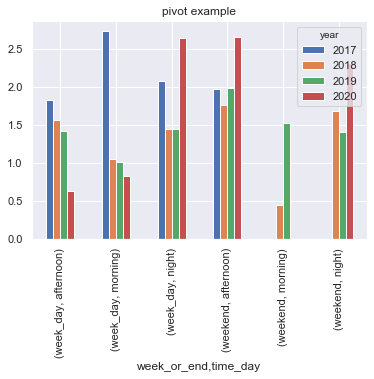

In [70]:
df.pivot_table(
    index=['week_or_end', 'time_day'],
    columns='year',
    values='distance',
    aggfunc='mean'
).plot.bar(title='pivot example')

In [273]:
time_day_group = df.groupby(['time_day'])

In [330]:
time_day_group['Activity Type'].value_counts()

time_day   Activity Type    
afternoon  Treadmill Running    100
           Running               67
           Cycling               61
morning    Cycling               32
           Running               11
           Treadmill Running      8
           Elliptical             3
night      Cycling               70
           Treadmill Running     44
           Running               34
           Elliptical             8
           Indoor Cycling         2
           Strength Training      1
Name: Activity Type, dtype: int64

In [335]:
time_day_group['Activity Type'].value_counts(normalize=True)['night']

Activity Type
Cycling              0.440252
Treadmill Running    0.276730
Running              0.213836
Elliptical           0.050314
Indoor Cycling       0.012579
Strength Training    0.006289
Name: Activity Type, dtype: float64

In [339]:
time_day_group['calories'].median()

79.5

In [341]:
time_day_group['Calories'].agg(['median', 'mean', 'count'])

,median,mean,count
time_day,,,
afternoon,126.0,190.149123,228
morning,79.5,111.185185,54
night,128.0,179.037975,158


time_day
afternoon    AxesSubplot(0.125,0.125;0.775x0.755)
morning      AxesSubplot(0.125,0.125;0.775x0.755)
night        AxesSubplot(0.125,0.125;0.775x0.755)
Name: Calories, dtype: object

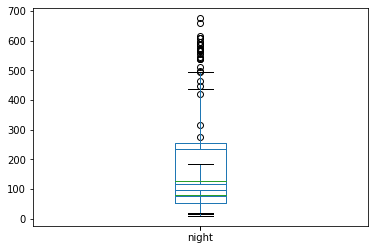

In [293]:
time_day_group['Calories'].plot(kind='box')

In [ ]:
time_day_group['Calories'].plot(kind='box')

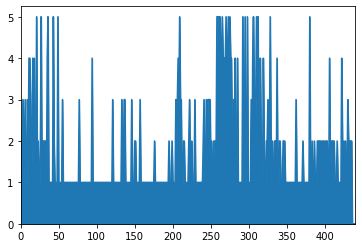

In [301]:
df['Number of Runs'].plot.area()

In [294]:
activity_group = df.groupby(['Activity Type'], as_index=True)

In [ ]:
activity_group.plot.bar() # can also add stacked=True

In [302]:
date_group = df.groupby(['date_exercise'], as_index=True)

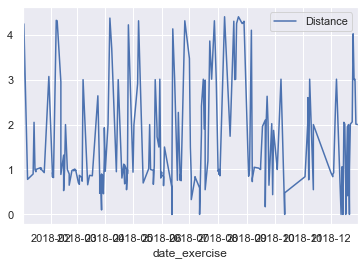

In [324]:
df[df['year'] == 2018].plot.line(x='date_exercise', y='Distance')

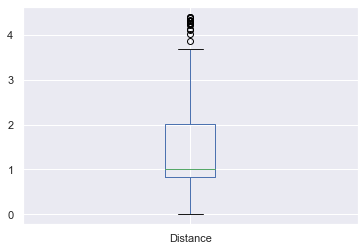

In [325]:
df.loc[df['year'] == 2018, 'Distance'].plot.box()

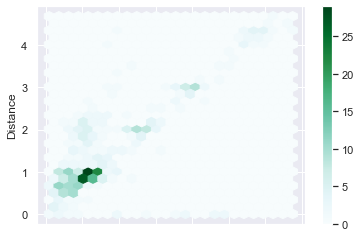

In [328]:
df[['Distance', 'Calories']].plot.hexbin(x='Calories', y='Distance', gridsize=25)

In [263]:
df.mean()

Distance                1.510998
Calories              176.468182
Avg HR                126.108844
Max HR                146.303855
Aerobic TE              1.791364
Avg Run Cadence       149.065693
Max Run Cadence       177.496350
Avg Stride Length       0.685034
Min Temp               78.314286
Number of Runs          1.711009
month                   6.911565
year                 2018.453515
week                   28.378685
weekday                 3.006803
quarter                 2.609977
dtype: float64

In [ ]:
df.describe()

## 4. Data Visualisation

In [246]:
type(df['Number of Runs'].iloc[0])

numpy.float64

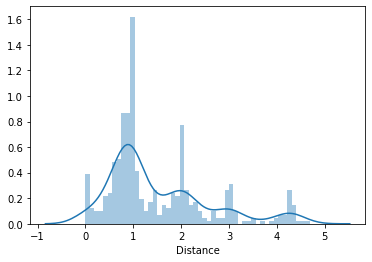

In [271]:
sns.distplot(df['Distance'], bins=50, kde=True)

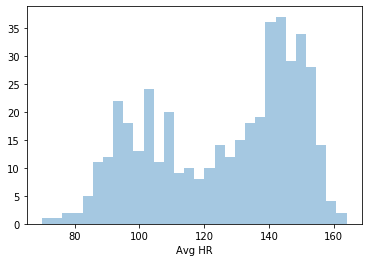

In [247]:
sns.distplot(df['Avg HR'], bins=30, kde=False)

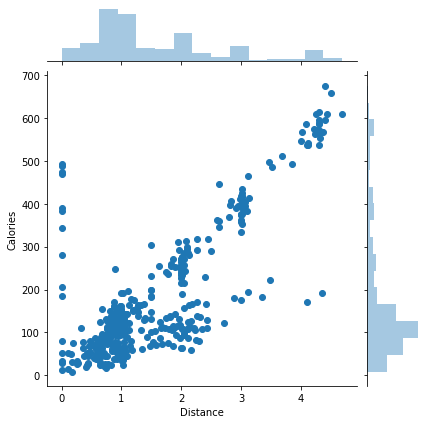

In [248]:
sns.jointplot(x='Distance', y='Calories', data=df)

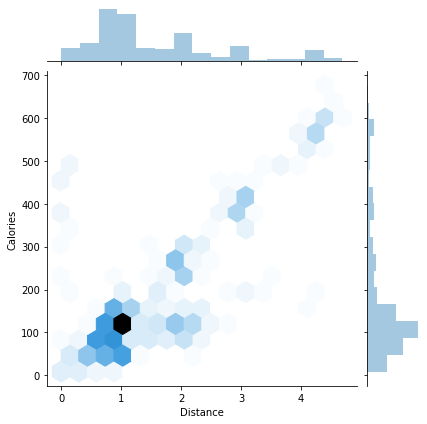

In [249]:
sns.jointplot(x='Distance', y='Calories', data=df, kind='hex')

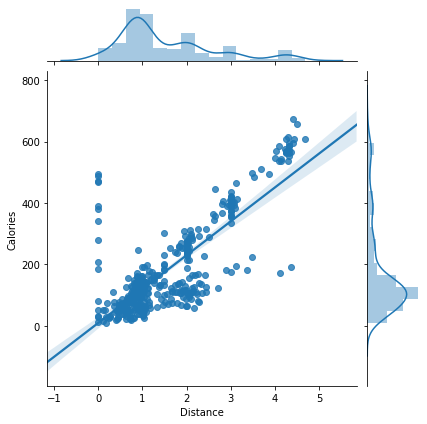

In [250]:
sns.jointplot(x='Distance', y='Calories', data=df, kind='reg')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


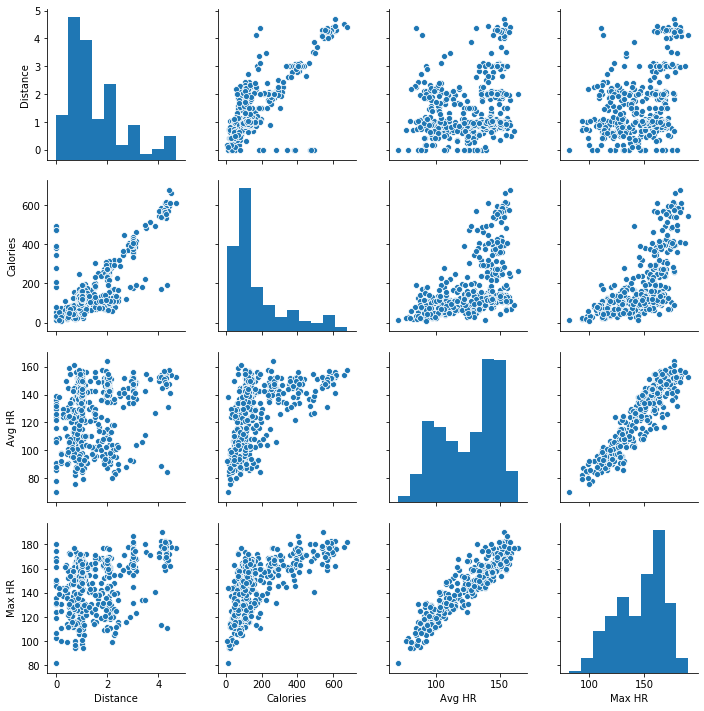

In [251]:
sns.pairplot(df[['Distance', 'Calories', 'Avg HR', 'Max HR']])

In [256]:
alt.Chart(df[['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title']]).mark_circle(size=60).encode(
    x='Distance',
    y='Calories',
    color='Title',
    tooltip=['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title']
).interactive()

alt.Chart(...)

In [260]:
alt.Chart(df[['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title', 'time_day']]).mark_circle(size=60).encode(
    x='Distance',
    y='Calories',
    color='time_day',
    tooltip=['Avg HR', 'Max HR', 'Calories', 'Distance', 'Title', 'time_day']
).interactive()

alt.Chart(...)

In [161]:
type(df['time_exercise'].iloc[1])

datetime.time

In [75]:
mask = (df['calories'] == max(df['calories']))
mask

0      False
1      False
2      False
3      False
4      False
       ...  
449    False
450    False
451    False
452    False
453    False
Name: calories, Length: 454, dtype: bool

In [79]:
today = datetime.date.today()
today

datetime.date(2020, 3, 17)

In [84]:
difference = today - df[mask]['date_exercise']
difference

274   572 days
Name: date_exercise, dtype: timedelta64[ns]

In [92]:
difference.iloc[0].total_seconds()

49420800.0

In [202]:
difference.iloc[0].days / 365

1.5561643835616439

In [158]:
df['Date'].dt.date.iloc[1]

datetime.date(2020, 4, 2)

ValueError: too many values to unpack (expected 2)